# Random generation of tracks based on connecting random points

In [1]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
import math

%matplotlib inline

%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

UsageError: Line magic function `%javascript` not found (But cell magic `%%javascript` exists, did you mean that instead?).


In [4]:
pts1 = np.array([[ 6.55525 ,  3.05472 ],[ 6.17284 ,  2.802609],[ 5.53946 ,  2.649209],[ 4.93053 ,  2.444444],[ 4.32544 ,  2.318749],[ 3.90982 ,  2.2875  ],[ 3.51294 ,  2.221875],[ 3.09107 ,  2.29375 ],[ 2.64013 ,  2.4375  ],[ 2.275444,  2.653124],[ 2.137945,  3.26562 ],[ 2.15982 ,  3.84375 ],[ 2.20982 ,  4.31562 ],[ 2.334704,  4.87873 ],[ 2.314264,  5.5047  ],[ 2.311709,  5.9135  ],[ 2.29638 ,  6.42961 ],[ 2.619374,  6.75021 ],[ 3.32448 ,  6.66353 ],[ 3.31582 ,  5.68866 ],[ 3.35159 ,  5.17255 ],[ 3.48482 ,  4.73125 ],[ 3.70669 ,  4.51875 ],[ 4.23639 ,  4.58968 ],[ 4.39592 ,  4.94615 ],[ 4.33527 ,  5.33862 ],[ 3.95968 ,  5.61967 ],[ 3.56366 ,  5.73976 ],[ 3.78818 ,  6.55292 ],[ 4.27712 ,  6.8283  ],[ 4.89532 ,  6.78615 ],[ 5.35334 ,  6.72433 ],[ 5.71583 ,  6.54449 ],[ 6.13452 ,  6.46019 ],[ 6.54478 ,  6.26068 ],[ 6.7873  ,  5.74615 ],[ 6.64086 ,  5.25269 ],[ 6.45649 ,  4.86206 ],[ 6.41586 ,  4.46519 ],[ 5.44711 ,  4.26519 ],[ 5.04087 ,  4.10581 ],[ 4.70013 ,  3.67405 ],[ 4.83482 ,  3.4375  ],[4,4],[ 5.34086 ,  3.43394 ],[ 5.76392 ,  3.55156 ],[ 6.37056 ,  3.8778  ],[ 6.53116 ,  3.47228 ]])
pts2 = np.array([[3,6],[6,6],[6,3],[3,3], [3,3]])

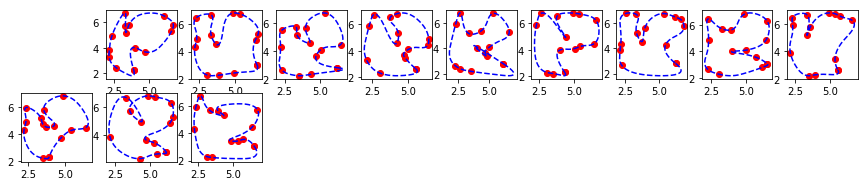

In [221]:
# define pts from the question

plt.figure(figsize=(15,15))

i = 1
for _ in range(100):
    indx = np.array(np.random.randint(0,len(pts1),15))
    indx.sort()
    pts = pts1[indx]
    
    tck = []
    try:
        tck, u = splprep(pts.T, u=None, s=0.0, per=True, k=2) 
    except:
        pass
    
    if tck:
        u_new = np.linspace(u.min(), u.max(), 1000)
        x_new, y_new = splev(u_new, tck, der=0)
        
        ax = plt.subplot(10,10,i+1)
        ax.plot(pts[:,0], pts[:,1], 'ro')
        ax.plot(x_new, y_new, 'b--')
        #ax.show()
        i += 1
        

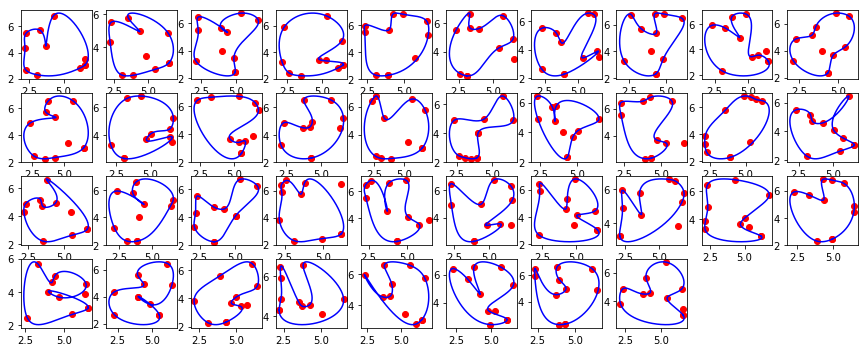

In [281]:
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt

plt.figure(figsize=(15,15))
i = 0
for _ in range(100):
    indx = np.array(np.random.randint(0,len(pts1),10))
    indx.sort()
    pts = pts1[indx]

    x = pts.T[0]
    y = pts.T[1]

    # append the starting x,y coordinates
    x = np.r_[x, x[0]]
    y = np.r_[y, y[0]]

    # fit splines to x=f(u) and y=g(u), treating both as periodic. also note that s=0
    # is needed in order to force the spline fit to pass through all the input points.
    tck = []
    try:
        tck, u = interpolate.splprep(pts.T, s=0.0, per=True)
    except:
        pass

    if tck:
        # evaluate the spline fits for 1000 evenly spaced distance values
        xi, yi = interpolate.splev(np.linspace(0, 1, 1000), tck, ext=1)

        # plot the result
        ax = plt.subplot(10,10,i+1)
        ax.plot(x, y, 'or')
        ax.plot(xi, yi, '-b')
        i += 1

# Using openai code

In [351]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
import math

%matplotlib inline

def get_track():
    STATE_W = 96   # less than Atari 160x192
    STATE_H = 96
    VIDEO_W = 600
    VIDEO_H = 400
    WINDOW_W = 900
    WINDOW_H = 600

    SCALE       = 6.0        # Track scale
    TRACK_RAD   = 900/SCALE  # Track is heavily morphed circle with this radius
    PLAYFIELD   = 2000/SCALE # Game over boundary
    FPS         = 50
    ZOOM        = 0.09        # Camera zoom
    ZOOM_FOLLOW = False       # Set to False for fixed view (don't use zoom)


    CHECKPOINTS = 12
    TRACK_DETAIL_STEP = 21/SCALE
    TRACK_TURN_RATE = 0.31
    TRACK_WIDTH = 40/SCALE
    BORDER = 8/SCALE
    BORDER_MIN_COUNT = 4

    # Create checkpoints
    checkpoints = []
    for c in range(CHECKPOINTS):
        alpha = 2*math.pi*c/CHECKPOINTS + np.random.uniform(-1,1)* 2*math.pi*1/CHECKPOINTS
        rad = np.random.uniform(TRACK_RAD/12, TRACK_RAD)
        if c==0:
            alpha = 0
            rad = 1.5*TRACK_RAD
        if c==CHECKPOINTS-1:
            alpha = 2*math.pi*c/CHECKPOINTS
            start_alpha = 2*math.pi*(-0.5)/CHECKPOINTS
            rad = 1.5*TRACK_RAD
        checkpoints.append( (alpha, rad*math.cos(alpha), rad*math.sin(alpha)) )

    #print "\n".join(str(h) for h in checkpoints)
    #self.road_poly = [ (    # uncomment this to see checkpoints
    #    [ (tx,ty) for a,tx,ty in checkpoints ],
    #    (0.7,0.7,0.9) ) ]
    road = []

    # Go from one checkpoint to another to create track
    x, y, beta = 1.5*TRACK_RAD + np.random.uniform(-1,1)*PLAYFIELD/2, np.random.uniform(-1,1)*PLAYFIELD/2, 0 # TODO
    dest_i = 0
    laps = 0
    track = []
    no_freeze = 2500
    visited_other_side = False
    while 1:
        alpha = math.atan2(y, x)
        if visited_other_side and alpha > 0:
            laps += 1
            visited_other_side = False
        if alpha < 0:
            visited_other_side = True
            alpha += 2*math.pi
        while True: # Find destination from checkpoints
            failed = True
            while True:
                dest_alpha, dest_x, dest_y = checkpoints[dest_i % len(checkpoints)]
                if alpha <= dest_alpha:
                    failed = False
                    break
                dest_i += 1
                if dest_i % len(checkpoints) == 0: break
            if not failed: break
            alpha -= 2*math.pi
            continue
        r1x = math.cos(beta)
        r1y = math.sin(beta)
        p1x = -r1y
        p1y = r1x
        dest_dx = dest_x - x  # vector towards destination
        dest_dy = dest_y - y
        proj = r1x*dest_dx + r1y*dest_dy  # destination vector projected on rad
        while beta - alpha >  1.5*math.pi: beta -= 2*math.pi
        while beta - alpha < -1.5*math.pi: beta += 2*math.pi
        prev_beta = beta
        proj *= SCALE
        if proj >  0.3: beta -= min(TRACK_TURN_RATE, abs(0.001*proj))
        if proj < -0.3: beta += min(TRACK_TURN_RATE, abs(0.001*proj))
        x += p1x*TRACK_DETAIL_STEP
        y += p1y*TRACK_DETAIL_STEP
        track.append( (alpha,prev_beta*0.5 + beta*0.5,x,y) )
        if laps > 1: break
        no_freeze -= 1
        if no_freeze==0: break
    #print "\n".join([str(t) for t in enumerate(track)])

    # Find closed loop range i1..i2, first loop should be ignored, second is OK
    i1, i2 = -1, -1
    i = len(track)
    while True:
        i -= 1
        if i==0: return False  # Failed
        pass_through_start = track[i][0] > start_alpha and track[i-1][0] <= start_alpha
        if pass_through_start and i2==-1:
            i2 = i
        elif pass_through_start and i1==-1:
            i1 = i
            break
    #print("Track generation: %i..%i -> %i-tiles track" % (i1, i2, i2-i1))
    assert i1!=-1
    assert i2!=-1

    track = track[i1:i2-1]
    
    track.append(track[0])        
        

    return track


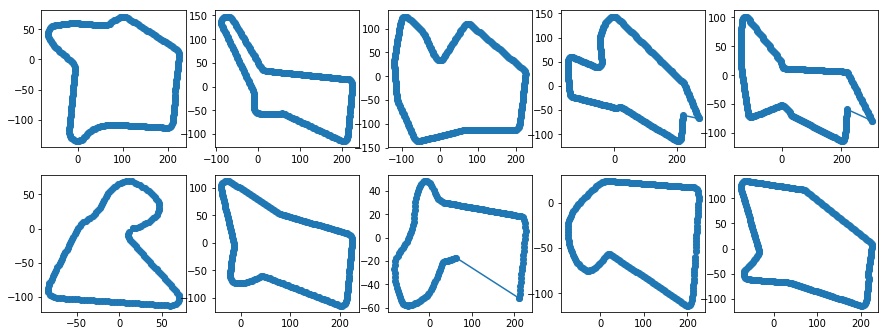

In [352]:
plt.figure(figsize=(15,60))
for i in range(10):
    track = False
    while track == False:
        track = get_track()
    track = [list(x) for x in track]
    track = np.array(track)
    ax = plt.subplot(20,5,i+1)
    ax.plot(track[:,2], track[:,3], 'o-')

# Finding oposite side based on angle

In [777]:
TRACK_DETAIL_STEP = 21/6.0

num_of_random_connections = 1
track = np.array(track)

# geting random org point
org_idx = np.random.randint(0, len(track), 1)[0]
alpha, beta, x, y = list(track[org_idx])

# get random angle/direction
rnd_dir = alpha + math.pi# + np.random.uniform(-1,1)*math.pi/6
if rnd_dir > 2*math.pi: rnd_dir -= 2*math.pi


In [778]:
dist = np.linalg.norm(track[:,2:]-[x,y], axis=1)

In [779]:
close = (dist <= TRACK_DETAIL_STEP*10000)*(dist > 0)

In [780]:
vect = track[:,2:]-[x,y]
dirs = np.arctan2(vect[:,1],vect[:,0])
dirs[dirs < 0] = dirs[dirs < 0] + 2*math.pi
sim_dir = (dirs >= rnd_dir - math.pi/8)*(dirs <= rnd_dir + math.pi/8)

In [781]:
final_filter = close*sim_dir
print(beta)

1.8599003214898049


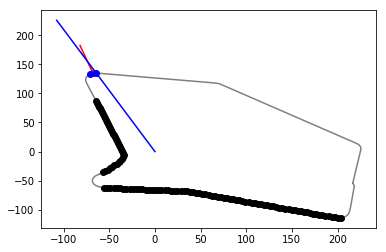

In [782]:
plt.plot(track[:,2], track[:,3], 'gray')
plt.plot(track[final_filter,2],track[final_filter,3],'o',color='black')
plt.plot(x,y,'or')
plt.plot([x,x+50*math.cos(beta)],[y,y+50*math.sin(beta)],'r')
plt.plot([0,250*math.cos(alpha)],[0,250*math.sin(alpha)],'b')
plt.plot(track[org_idx+1,2],track[org_idx+1,3],'ob')
plt.plot(track[org_idx-1,2],track[org_idx-1,3],'ob')

In [783]:
list(track[org_idx-1])

[1.9960144036446488,
 1.5750144950929905,
 -64.35185767916731,
 134.89731581113676]

---

In [339]:
x, y, beta = 0, 0, 0 # TODO
dest_i = 0
laps = 0
track = []
no_freeze = 2500
visited_other_side = False
SCALE = 6.0
checkpoints = [[0,0,0],[0,1,1]]
while 1:
    alpha = math.atan2(y, x)
    if visited_other_side and alpha > 0:
        laps += 1
        visited_other_side = False
    if alpha < 0:
        visited_other_side = True
        alpha += 2*math.pi
    while True: # Find destination from checkpoints
        failed = True
        while True:
            dest_alpha, dest_x, dest_y = checkpoints[dest_i % len(checkpoints)]
            if alpha <= dest_alpha:
                failed = False
                break
            dest_i += 1
            if dest_i % len(checkpoints) == 0: break
        if not failed: break
        alpha -= 2*math.pi
        continue
    r1x = math.cos(beta)
    r1y = math.sin(beta)
    p1x = -r1y
    p1y = r1x
    dest_dx = dest_x - x  # vector towards destination
    dest_dy = dest_y - y
    proj = r1x*dest_dx + r1y*dest_dy  # destination vector projected on rad
    while beta - alpha >  1.5*math.pi: beta -= 2*math.pi
    while beta - alpha < -1.5*math.pi: beta += 2*math.pi
    prev_beta = beta
    proj *= SCALE
    if proj >  0.3: beta -= min(TRACK_TURN_RATE, abs(0.001*proj))
    if proj < -0.3: beta += min(TRACK_TURN_RATE, abs(0.001*proj))
    x += p1x*TRACK_DETAIL_STEP
    y += p1y*TRACK_DETAIL_STEP
    track.append( (alpha,prev_beta*0.5 + beta*0.5,x,y) )
    if laps > 1: break
    no_freeze -= 1
    if no_freeze==0: break

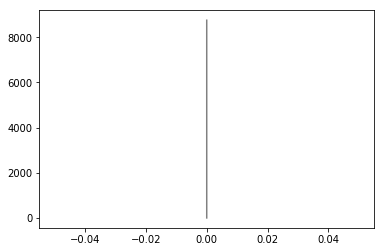

In [340]:
track = np.array(track)
plt.plot(track[:,2], track[:,3], 'gray')